In [1]:
import pandas as pd
import numpy as np
import random
import geopandas as gpd
import matplotlib.pyplot as plt
import datetime
from shapely.geometry import Point
from shapely.geometry import Polygon
from IPython.display import clear_output

In [2]:
df_meetup = pd.read_pickle('./pickles/utseus-meetup.pk')

In [5]:
type(df_meetup)

pandas.core.frame.DataFrame

In [4]:
df_meetup

,created,rating,description,members_count,name,urlname,who,zip,country_code,city,lon,lat,city_member_count,topics
group_id,,,,,,,,,,,,,,
394,1045694054000,4.52,None,43,OC Grassroots Progressives (20 Million Loud ),20millionloud-38,Young Adult Voters,92625,us,Corona del Mar,-117.860001,33.599998,386,[20 Million Loud]
394,1045694054000,4.52,None,43,OC Grassroots Progressives (20 Million Loud ),20millionloud-38,Young Adult Voters,92650,us,East Irvine,-117.760002,33.680000,16,[20 Million Loud]
394,1045694054000,4.52,None,43,OC Grassroots Progressives (20 Million Loud ),20millionloud-38,Young Adult Voters,92656,us,Aliso Viejo,-117.739998,33.580002,2037,[20 Million Loud]
394,1045694054000,4.52,None,43,OC Grassroots Progressives (20 Million Loud ),20millionloud-38,Young Adult Voters,92657,us,Newport Coast,-117.809998,33.590000,208,[20 Million Loud]
394,1045694054000,4.52,None,43,OC Grassroots Progressives (20 Million Loud ),20millionloud-38,Young Adult Voters,92658,us,Newport Beach,-117.860001,33.639999,4360,[20 Million Loud]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20498084,1475107118000,0.00,<p>The DIG ID group is focused on sharing disc...,1,DIG ID - Sydney Digital Identity Meetup,DIG-ID-Sydney-Digital-Identity-Meetup,Members,meetup3153,au,Lane Cove,151.169998,-33.810001,0,"[Digital Identity, OpenID, Identity & Access M..."
20498742,1475110000000,0.00,<p>I realise this will be a unique small group...,1,Nana's with grandkids (Hills District),Nanas-with-grandkids-Hills-District,Nana's & Grandkids,meetup3153,au,Lane Cove,151.169998,-33.810001,0,"[Playdates, Grandparents, Toddlers, HEALTHY KI..."
20499519,1475112990000,0.00,"<p>All Those with fitness, dance, workout inte...",1,London Dance Fitness Meetup,London-Dance-Fitness-Meetup,Members,N1 5ET,gb,Greater London,-0.080000,51.540001,0,"[Zumba, Zumba Classes, Dance Fitness]"


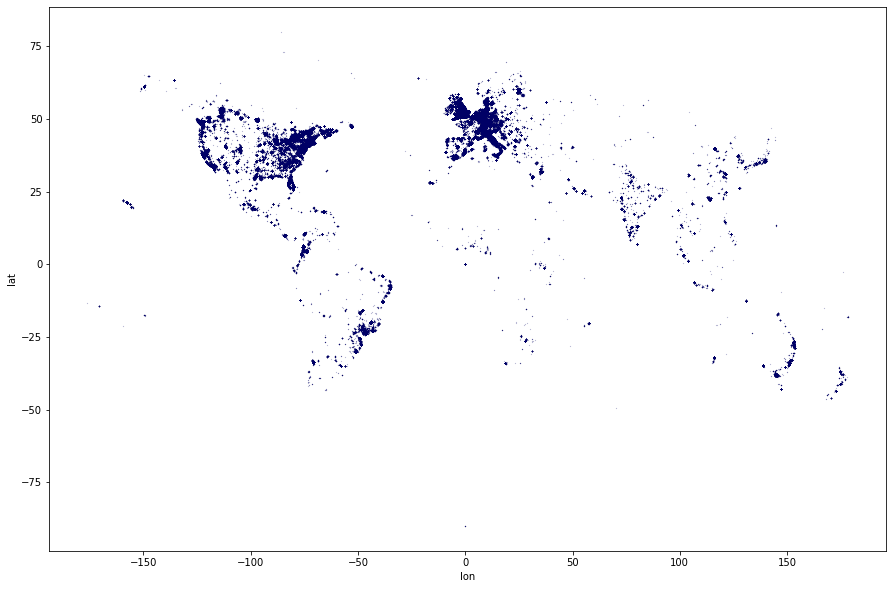

In [6]:
df_meetup.plot.scatter(x='lon', y='lat', s=0.01, c='#000066', figsize=(15,10))

In [8]:
#df_poi has value na
print(len(df_meetup))
print(len(df_meetup.dropna()))

4081398
4070225


In [9]:
print(sum(df_meetup.lon.isna()))
print(sum(df_meetup.lat.isna()))

0
0


In [10]:
print(type(df_meetup.name.iloc[0]))
print(type(df_meetup.lon.iloc[0]))
print(type(df_meetup.lat.iloc[0]))

<class 'str'>
<class 'numpy.float64'>
<class 'numpy.float64'>


In [11]:
df_meetup = df_meetup.rename(columns={"lon": "longitude", "lat": "latitude"})

In [12]:
#Bonded box Shanghai
topSh = 31.51499
rightSh = 121.80461
bottomSh = 30.975
leftSh = 121.10157
df_meetup = df_meetup[(df_meetup['longitude'] >= leftSh) & (df_meetup['longitude'] <= rightSh) & (df_meetup['latitude'] >= bottomSh) & (df_meetup['latitude'] <= topSh)]

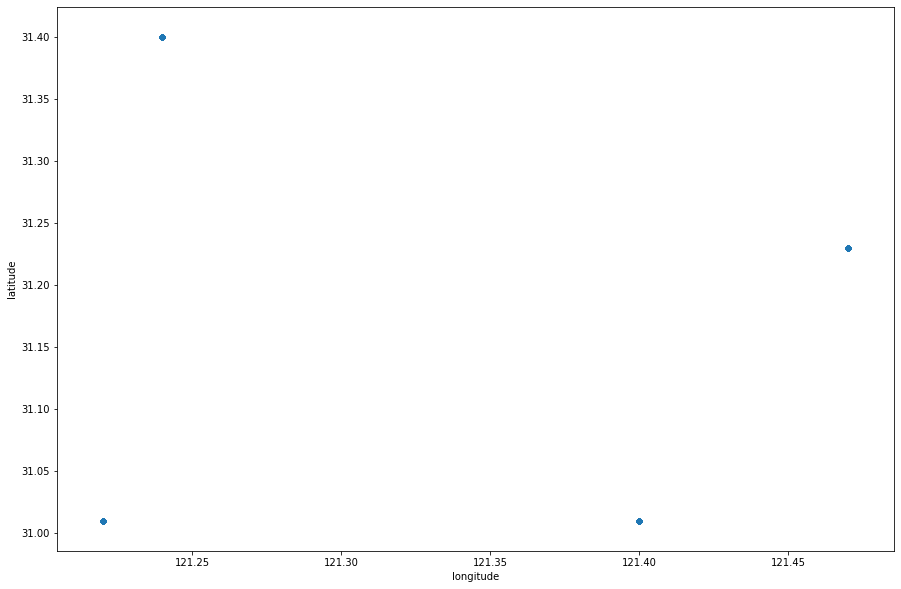

In [22]:
df_meetup.plot.scatter(x='longitude', y='latitude', figsize=(15,10))

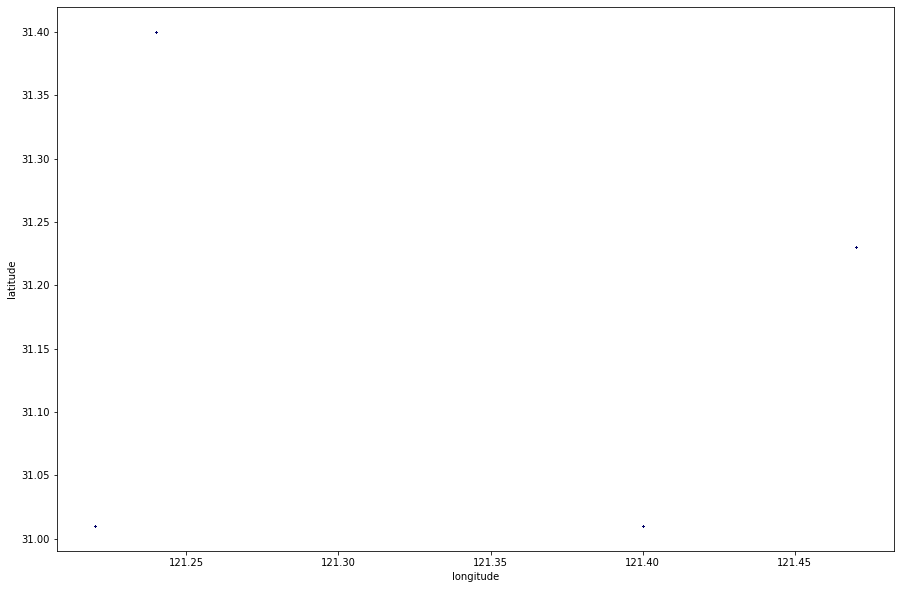

In [15]:
df_meetup.plot.scatter(x='longitude', y='latitude', s=0.02, c='#000066', figsize=(15,10))

In [16]:
len(df_meetup)

3023

In [17]:
df_meetup

,created,rating,description,members_count,name,urlname,who,zip,country_code,city,longitude,latitude,city_member_count,topics
group_id,,,,,,,,,,,,,,
1606421,1267342154000,4.55,"<p>Welcome to the SSV Network! The ""Startups &...",297,Founders Central CHINA,FoundersCentralCHINA,Entrepreneurs,meetup1,cn,Shanghai,121.470001,31.23,1454,"[Small Business, Alternative Energy, Social Ne..."
1606421,1267342154000,4.55,"<p>Welcome to the SSV Network! The ""Startups &...",297,Founders Central CHINA,FoundersCentralCHINA,Entrepreneurs,meetup226,cn,Minhang,121.400002,31.01,0,"[Small Business, Alternative Energy, Social Ne..."
1606421,1267342154000,4.55,"<p>Welcome to the SSV Network! The ""Startups &...",297,Founders Central CHINA,FoundersCentralCHINA,Entrepreneurs,meetup404,cn,Majie,121.220001,31.01,0,"[Small Business, Alternative Energy, Social Ne..."
1606421,1267342154000,4.55,"<p>Welcome to the SSV Network! The ""Startups &...",297,Founders Central CHINA,FoundersCentralCHINA,Entrepreneurs,meetup492,cn,Jiading,121.239998,31.40,5,"[Small Business, Alternative Energy, Social Ne..."
1687245,1281193715000,4.48,"<p>There is an old Chinese saying, ""we depend ...",1922,Expats' Hangout Shanghai,Expats-Hangout-Shanghai,Members,meetup1,cn,Shanghai,121.470001,31.23,1454,"[Expat Canadian, Expat British, Expat French, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20434465,1474089850000,0.00,<p>An Amazing opportunity for both expats and ...,1,Shanghai Connector Social Events,Shanghai-Connector-Social-Events,Members,meetup404,cn,Majie,121.220001,31.01,0,"[Expat, Fun Times, Professional Networking, Ea..."
20434680,1474097696000,0.00,<p><span>This group is create for people like ...,1,Dream Crafters,dcrafters,Members,meetup226,cn,Minhang,121.400002,31.01,0,"[Weight Loss, Fitness, Wellness, Sports and Re..."
20434680,1474097696000,0.00,<p><span>This group is create for people like ...,1,Dream Crafters,dcrafters,Members,meetup404,cn,Majie,121.220001,31.01,0,"[Weight Loss, Fitness, Wellness, Sports and Re..."


In [18]:
df_meetup.name.value_counts()

EnjoyShanghai.com                              4
Startup Masterminds - Shanghai                 4
Shanghai urban Meetup                          4
Shanghai Business & Social Network 上海科技经贸论坛    4
Shanghai Expat&Insider Shanghainess Meetup     4
                                              ..
DigitalOcean Shanghai                          2
Think and Grow Rich (Shanghai)                 2
Shanghai Connector Social Events               2
Brave Women Travel Shanghai                    2
DefenceLab Shanghai                            2
Name: name, Length: 766, dtype: int64

We can't do something with meetup, the geographic positions are not well distributed

In [48]:
from pyproj import Transformer

transformer = Transformer.from_crs("EPSG:4326", "EPSG:4479", always_xy=True)


def getNewLongitude(xy):
    return transformer.transform(xy[0], xy[1])[0]

def getNewLatitude(xy):
    return transformer.transform(xy[0], xy[1])[1]


df_meetup['longitude_m'] = df_meetup[['longitude', 'latitude']].copy().apply(getNewLongitude, axis=1)
df_meetup['latitude_m'] = df_meetup[['longitude', 'latitude']].copy().apply(getNewLatitude, axis=1)